###
Visualizing And Analysing The Data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows',None)

In [2]:
#Read data
df=pd.read_csv(r"\Human Resource Management Predicting Employee Promotions Using Machine Learning\5.Project Executable Files\Dataset\emp_promotion.csv")

In [3]:
print('Shape of the data = {}'.format(df.shape))

Shape of the data = (54808, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


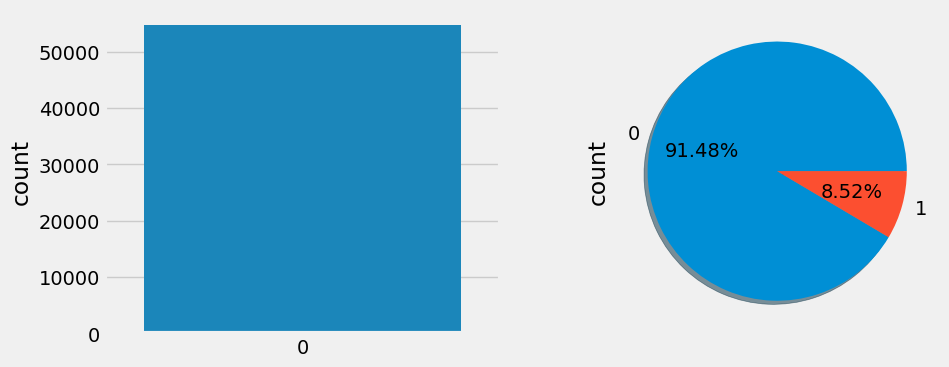

In [6]:
#Univariate Analysis
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(df['is_promoted'])      
plt.subplot(122)
df['is_promoted'].value_counts().plot(kind='pie',autopct = '%.2f%%',shadow=True)
plt.show()

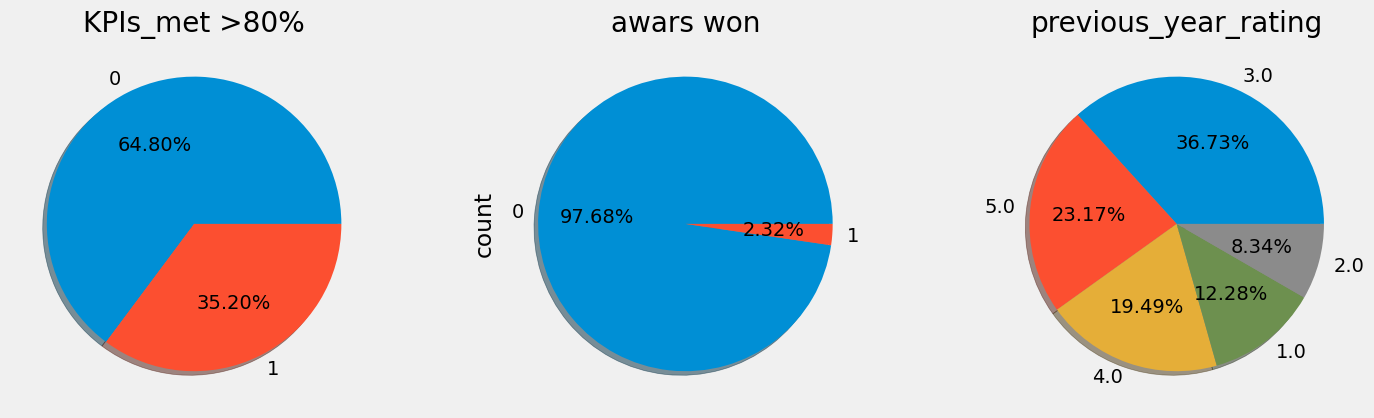

In [7]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('KPIs_met >80%')
df['KPIs_met >80%'].value_counts().plot(kind='pie',shadow=True,autopct='%.2f%%')
plt.subplot(232)
plt.title('awars won')
df['awards_won?'].value_counts().plot(kind='pie',shadow=True,autopct='%.2f%%')
plt.subplot(233)
plt.axis('off')
plt.title("previous_year_rating")
df['previous_year_rating'].value_counts().plot(kind='pie', shadow=True,autopct='%.2f%%')

plt.show()

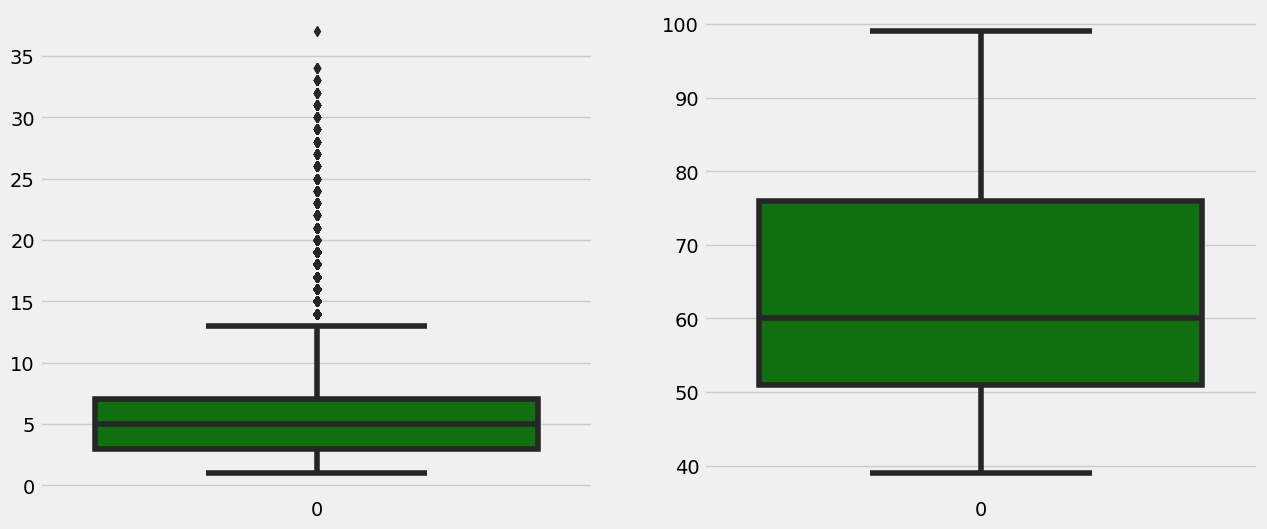

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.boxplot(df['length_of_service'],color='g')
plt.subplot(122)
sns.boxplot(df['avg_training_score'],color='g')
plt.show()

<Axes: xlabel='avg_training_score', ylabel='previous_year_rating'>

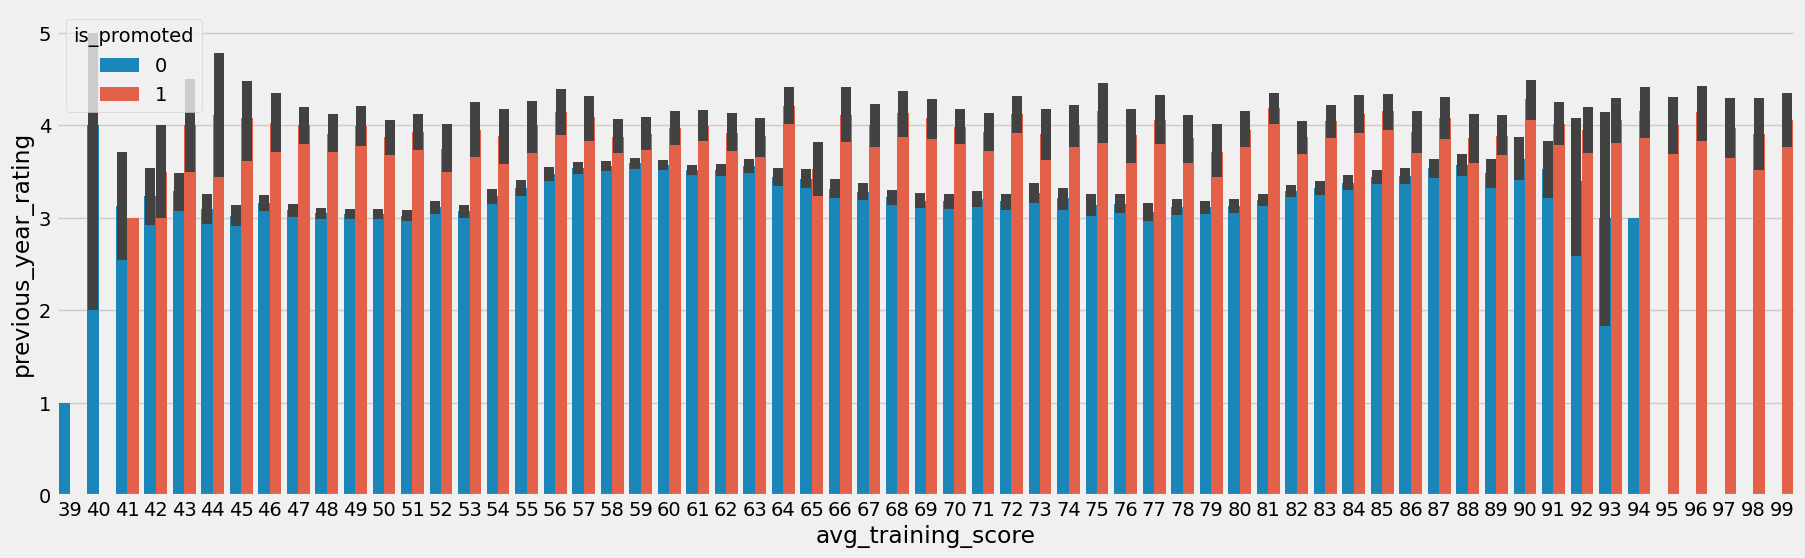

In [9]:
#Multivariate Analysis
plt.figure(figsize=(20,6))
sns.barplot(x='avg_training_score',y='previous_year_rating',hue='is_promoted',data=df)

In [10]:
#Descriptive Analysis'
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


##
Data Pre-Processing

In [11]:
#Dropping Unwanted features 
df=df.drop(['employee_id','gender','region','recruitment_channel'],axis=1)

In [50]:
#Checking and Handing Null values
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
#Replacing Nan with Mode
print(df['education'].value_counts())
df['education']=df['education'].fillna(df['education'].mode()[0])

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64


In [13]:
print(df['previous_year_rating'].value_counts())
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])

previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: count, dtype: int64


##
Deleting Negative Data

In [14]:
#Remove Negative Value
negative=df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & 
         (df['is_promoted']==1) & (df['avg_training_score']<60)]
negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


In [15]:
#Remove Negative Value
df.drop(index=[31860,51374],inplace=True)

In [16]:
#Handling Outliers
q1=np.quantile(df['length_of_service'],0.25)
q3=np.quantile(df['length_of_service'],0.75)
IQR=q3-q1
upperBound=(1.5*IQR)+q3
lowerBound=(1.5*IQR)-q1
print('q1:',q1)
print('q2:',q3)
print('IQR:',IQR)
print('Upperbound:',upperBound)
print('Lowerbound:',lowerBound)
print('skeweddata:',len(df[df['length_of_service']>upperBound]))

q1: 3.0
q2: 7.0
IQR: 4.0
Upperbound: 13.0
Lowerbound: 3.0
skeweddata: 3489


In [17]:
pd.crosstab(df['length_of_service']>upperBound,df['is_promoted'])

is_promoted,0,1
length_of_service,,
False,46885,4432
True,3255,234


In [18]:
#Capping
df['length_of_service']=[upperBound if x>upperBound else x for x in df['length_of_service']]

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54806 entries, 0 to 54807
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54806 non-null  object 
 1   education             54806 non-null  object 
 2   no_of_trainings       54806 non-null  int64  
 3   age                   54806 non-null  int64  
 4   previous_year_rating  54806 non-null  float64
 5   length_of_service     54806 non-null  float64
 6   KPIs_met >80%         54806 non-null  int64  
 7   awards_won?           54806 non-null  int64  
 8   avg_training_score    54806 non-null  int64  
 9   is_promoted           54806 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 4.6+ MB


In [19]:
#Handling Categorical Values
df['education']=df['education'].replace(("Below Secondary","Bachelor's","Master's & above"),(1,2,3))
lb=LabelEncoder()
df['department']=lb.fit_transform(df['department'])

In [20]:
#Handling Imbalanced Data
# Splitting data and resampling it
x = df.drop('is_promoted',axis=1)
y=df['is_promoted'] 
print(x.shape) 
print(y.shape)

(54806, 9)
(54806,)


In [21]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE
sm =SMOTE(random_state=42,k_neighbors=2)
x_resample, y_resample = sm.fit_resample(x,y)

Text(0.5, 1.0, 'After oversampling')

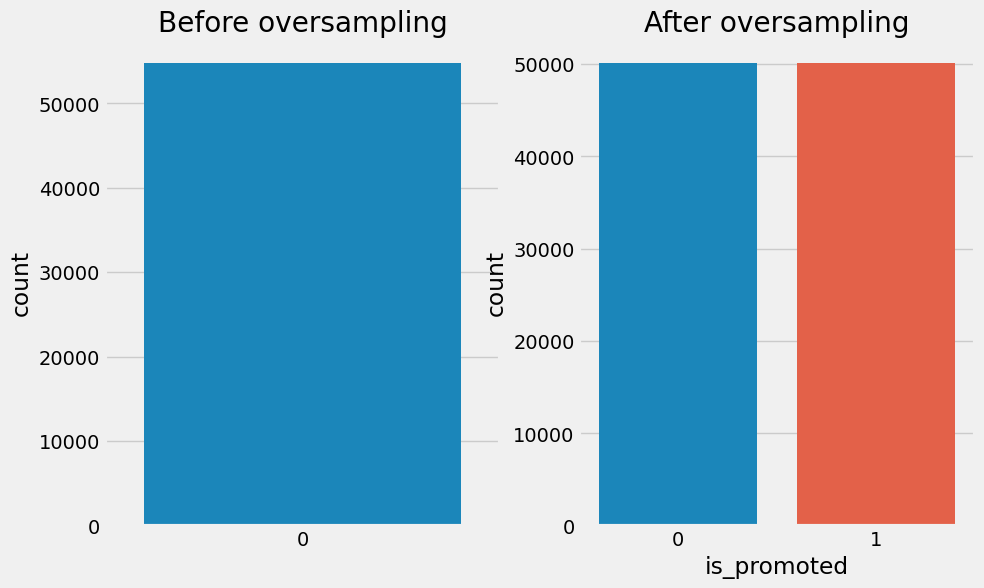

In [22]:
plt.figure(figsize=(10,6))
plt.subplot(121) 
sns.countplot(y)
plt.title('Before oversampling') 
plt.subplot(122)
sns.countplot(x=y_resample)
plt.title('After oversampling')

In [23]:
print(x.dtypes)

department                int32
education                 int64
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service       float64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object


In [24]:
#Splitting Data Into Train And Test
x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample,test_size=0.3,random_state=10)
print('Shape of x_train {}'.format(x_train.shape)) 
print('Shape of y_train {}'.format(y_train.shape)) 
print('Shape of x_test {}'.format(x_test.shape)) 
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (70196, 9)
Shape of y_train (70196,)
Shape of x_test (30084, 9)
Shape of y_test (30084,)


##
Model Building


In [65]:
#Decision Tree Classifier
def DecisionTree(x_train,x_test,y_train,y_test):
    # Define the parameter grid
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Initialize the DecisionTreeClassifier
    dtc = DTC()
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    
    # Fit the grid search to the training data
    grid_search.fit(x_train, y_train)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters Found by GridSearch:")
    print(best_params)
    
    # Predict on the test data using the best estimator
    best_dtc = grid_search.best_estimator_
    predictions = best_dtc.predict(x_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Generate the classification report
    cr = classification_report(y_test, predictions)
    print("\nClassification Report:")
    print(cr)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("\nAccuracy Score:")
    print(accuracy)
    
    return best_params, cm, cr, accuracy


In [66]:
DecisionTree(x_train,x_test,y_train,y_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters Found by GridSearch:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Confusion Matrix:
[[14111   954]
 [  809 14210]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     15065
           1       0.94      0.95      0.94     15019

    accuracy                           0.94     30084
   macro avg       0.94      0.94      0.94     30084
weighted avg       0.94      0.94      0.94     30084


Accuracy Score:
0.9413974205557771


({'criterion': 'gini',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 5},
 array([[14111,   954],
        [  809, 14210]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.95      0.94      0.94     15065\n           1       0.94      0.95      0.94     15019\n\n    accuracy                           0.94     30084\n   macro avg       0.94      0.94      0.94     30084\nweighted avg       0.94      0.94      0.94     30084\n',
 0.9413974205557771)

In [67]:

#Random Forest Model
def RandomForest(x_train, x_test, y_train, y_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': [10, 50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Initialize the RandomForestClassifier
    rfc = RandomForestClassifier()
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    
    # Fit the grid search to the training data
    grid_search.fit(x_train, y_train)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters Found by GridSearch:")
    print(best_params)
    
    # Predict on the test data using the best estimator
    best_rfc = grid_search.best_estimator_
    predictions = best_rfc.predict(x_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Generate the classification report
    cr = classification_report(y_test, predictions)
    print("\nClassification Report:")
    print(cr)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("\nAccuracy Score:")
    print(accuracy)
    
    return best_params, cm, cr, accuracy

In [68]:
RandomForest(x_train, x_test, y_train, y_test)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters Found by GridSearch:
{'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Confusion Matrix:
[[14442   623]
 [  639 14380]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     15065
           1       0.96      0.96      0.96     15019

    accuracy                           0.96     30084
   macro avg       0.96      0.96      0.96     30084
weighted avg       0.96      0.96      0.96     30084


Accuracy Score:
0.9580507911182023


({'criterion': 'entropy',
  'max_depth': 40,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 200},
 array([[14442,   623],
        [  639, 14380]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96     15065\n           1       0.96      0.96      0.96     15019\n\n    accuracy                           0.96     30084\n   macro avg       0.96      0.96      0.96     30084\nweighted avg       0.96      0.96      0.96     30084\n',
 0.9580507911182023)

In [71]:
#KNN Model
def KNN(x_train, x_test, y_train, y_test):
    # Define the parameter grid
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]
    }
    
    # Initialize the KNeighborsClassifier
    knn = KNeighborsClassifier()
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    
    # Fit the grid search to the training data
    grid_search.fit(x_train, y_train)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters Found by GridSearch:")
    print(best_params)
    
    # Predict on the test data using the best estimator
    best_knn = grid_search.best_estimator_
    predictions = best_knn.predict(x_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Generate the classification report
    cr = classification_report(y_test, predictions)
    print("\nClassification Report:")
    print(cr)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("\nAccuracy Score:")
    print(accuracy)
    
    return best_params, cm, cr, accuracy

In [72]:
KNN(x_train, x_test, y_train, y_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters Found by GridSearch:
{'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Confusion Matrix:
[[13308  1757]
 [  386 14633]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93     15065
           1       0.89      0.97      0.93     15019

    accuracy                           0.93     30084
   macro avg       0.93      0.93      0.93     30084
weighted avg       0.93      0.93      0.93     30084


Accuracy Score:
0.9287661215263928


({'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'},
 array([[13308,  1757],
        [  386, 14633]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.97      0.88      0.93     15065\n           1       0.89      0.97      0.93     15019\n\n    accuracy                           0.93     30084\n   macro avg       0.93      0.93      0.93     30084\nweighted avg       0.93      0.93      0.93     30084\n',
 0.9287661215263928)

In [73]:

#XgBoost Model
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def XGBoost(x_train, x_test, y_train, y_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    
    # Initialize the XGBClassifier
    xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
    
    # Fit the grid search to the training data
    grid_search.fit(x_train, y_train)
    
    # Get the best parameters
    best_params = grid_search.best_params_
    print("Best Parameters Found by GridSearch:")
    print(best_params)
    
    # Predict on the test data using the best estimator
    best_xgb = grid_search.best_estimator_
    predictions = best_xgb.predict(x_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Generate the classification report
    cr = classification_report(y_test, predictions)
    print("\nClassification Report:")
    print(cr)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("\nAccuracy Score:")
    print(accuracy)
    
    return best_params, cm, cr, accuracy


In [74]:
XGBoost(x_train, x_test, y_train, y_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters Found by GridSearch:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}

Confusion Matrix:
[[14182   883]
 [  750 14269]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     15065
           1       0.94      0.95      0.95     15019

    accuracy                           0.95     30084
   macro avg       0.95      0.95      0.95     30084
weighted avg       0.95      0.95      0.95     30084


Accuracy Score:
0.9457186544342507


({'colsample_bytree': 1.0,
  'learning_rate': 0.2,
  'max_depth': 9,
  'n_estimators': 200,
  'subsample': 0.8},
 array([[14182,   883],
        [  750, 14269]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.95      0.94      0.95     15065\n           1       0.94      0.95      0.95     15019\n\n    accuracy                           0.95     30084\n   macro avg       0.95      0.95      0.95     30084\nweighted avg       0.95      0.95      0.95     30084\n',
 0.9457186544342507)

In [75]:
#Compare the Model
def compareModel(x_train,x_test,y_train,y_test):
    DecisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    RandomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    XGBoost(x_train, x_test, y_train, y_test)

In [76]:
compareModel(x_train, x_test, y_train, y_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters Found by GridSearch:
{'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 5}

Confusion Matrix:
[[14106   959]
 [  814 14205]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     15065
           1       0.94      0.95      0.94     15019

    accuracy                           0.94     30084
   macro avg       0.94      0.94      0.94     30084
weighted avg       0.94      0.94      0.94     30084


Accuracy Score:
0.9410650179497407
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters Found by GridSearch:
{'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Confusion Matrix:
[[14426   639]
 [  638 14381]]

Classification

In [77]:
#Save the model
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
yPred=rf.predict(x_test)
cv=cross_val_score(rf,x_resample,y_resample,cv=5)
np.mean(cv)


0.9543079377742322

In [78]:
pickle.dump(rf,open('model.pkl','wb'))